In [1]:
%matplotlib inline

# Resume Grader Demo
## An NLP-based Resume Analysis Tool

This tool helps job seekers understand how their resume matches with job postings by analyzing:
- Technical and soft skill matches
- Semantic similarity of content
- Keyword optimization

In [1]:
import sys
sys.path.append('..')
from src.parsers.resume_parser import parse_resume
from src.parsers.job_parser import load_real_jobs
from src.models.semantic_matcher import ResumeJobMatcher
from src.visualization.MatchVisualizer import MatchVisualizer

c:\Users\MrRic\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Sample Job Postings
We'll analyze matches against these real job postings:
- Adobe Software Engineer Intern
- Amazon Robotics Software Engineer
- NVIDIA AI/ML Infrastructure Engineer
- InstaDeep ML Research Intern
- Alo Business Systems Engineer

In [2]:
import os
os.makedirs('../data/resumes', exist_ok=True)

# Parse resume

resume_path = '../data/resumes/Matt_Hui_Resume.pdf'
print("Parsing resume...")
resume_profile = parse_resume(resume_path)

# Load jobs
print("\nLoading job descriptions...")
job_profiles = load_real_jobs('../data/job_descriptions/real_jobs.json')

# Initialize matcher
matcher = ResumeJobMatcher()

# Perform matching
print("\nAnalyzing matches...")
match_results = matcher.match_resume_to_jobs(resume_profile, job_profiles)

Parsing resume...

Loading job descriptions...

Analyzing matches...


In [3]:
# Display results
best_match = max(result['overall_match'] for result in match_results) * 100
grade_letter = 'A' if best_match >= 75 else 'B' if best_match >= 65 else 'C' if best_match >= 55 else 'D' if best_match >= 45 else 'F'

print(f"\nOverall Resume Grade: {grade_letter} ({best_match:.1f}%)")
print("\nTop Job Matches:")
for idx, result in enumerate(match_results[:3], 1):
    print(f"\n{idx}. {result['job_title']} at {result['company']}")
    print(f"   Match: {result['overall_match']*100:.1f}%")
    print(f"   Key matching skills: {', '.join(result['matching_skills'][:3])}")


Overall Resume Grade: C (56.0%)

Top Job Matches:

1. AI/ML Infrastructure Software Engineer at NVIDIA
   Match: 56.0%
   Key matching skills: machine learning, pytorch, ai

2. Machine Learning Research Intern at InstaDeep
   Match: 47.9%
   Key matching skills: machine learning, pytorch, ai

3. Robotics Software Engineer at Amazon Robotics
   Match: 44.8%
   Key matching skills: machine learning, java, python


c:\Programming\6320-final\notebooks\..\src\visualization\MatchVisualizer.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categories, y=scores, ax=ax2, palette='viridis')


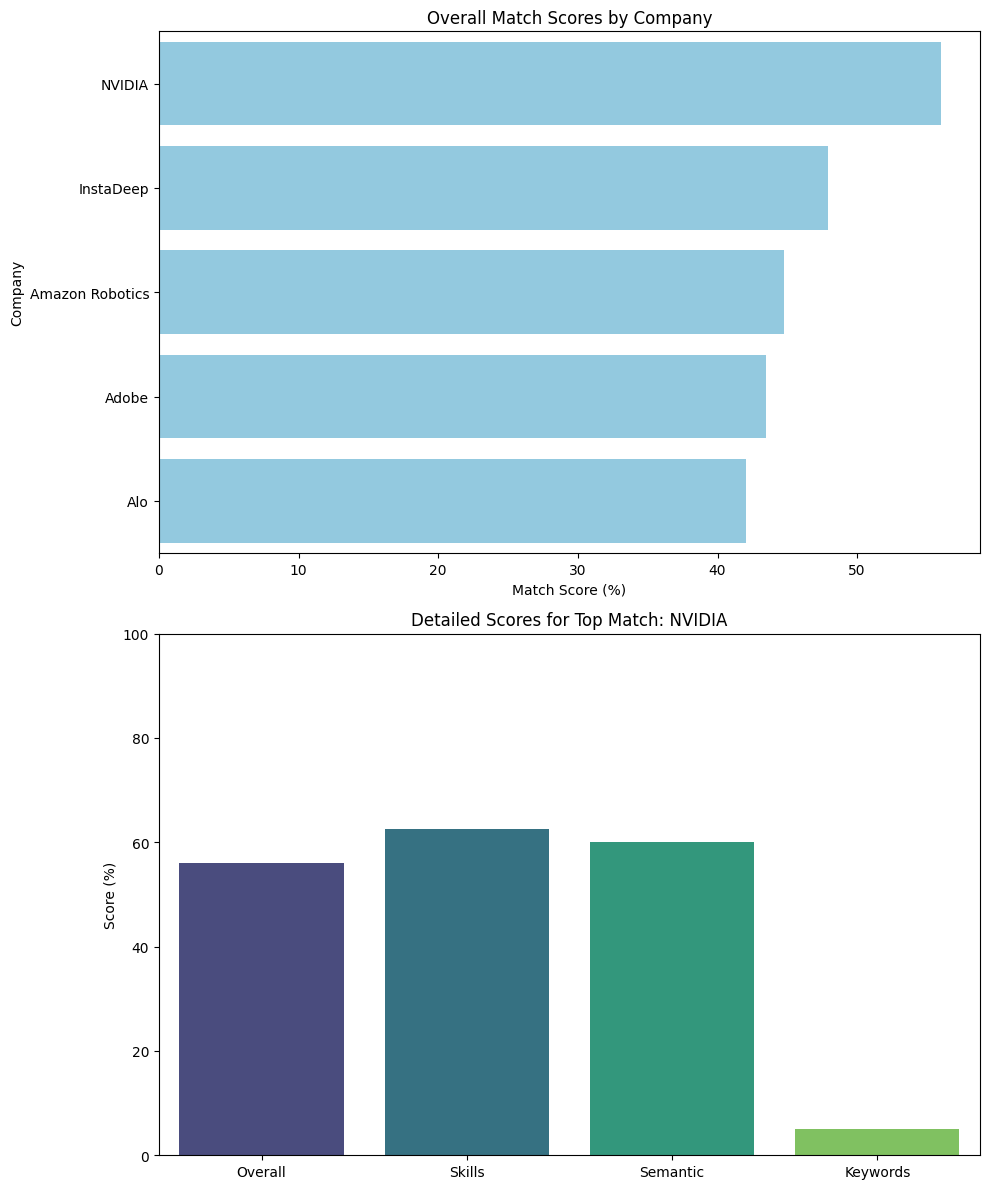

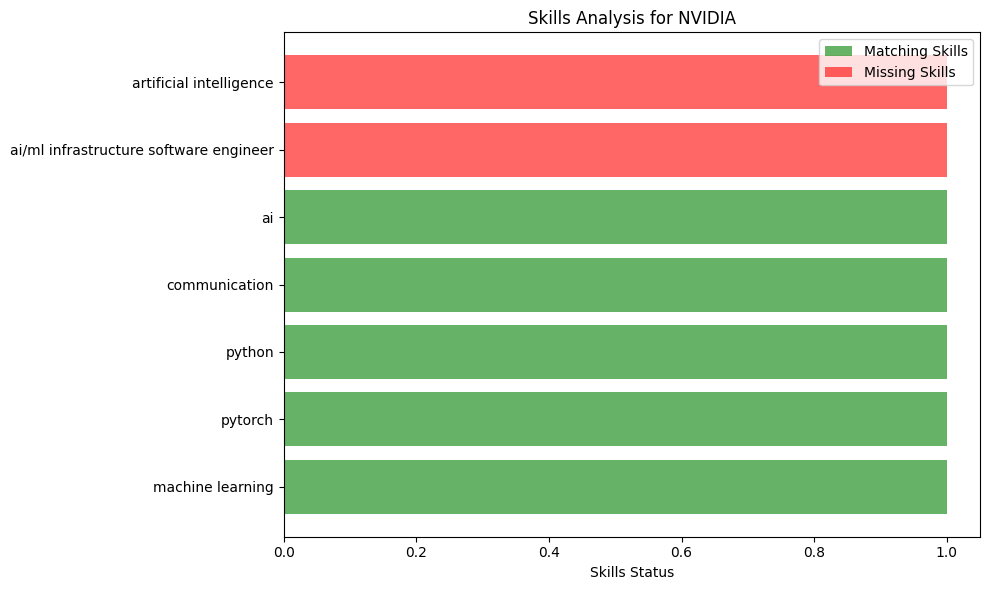

In [12]:
# Create visualizations
visualizer = MatchVisualizer()
visualizer.create_match_summary(match_results)
visualizer.create_skills_comparison(match_results[0])